# Microcanonical ensemble - distinguishable particles
Authors: Livia Maskos, Professor Bart Hoogenboom

Outline:

- generate an animation with all possible configurations of a microcanonical ensemble for distinguisable particles (variables: lattice sites, particles)
- for a given 2D lattice: create plot (number of configurations against number of particles)
!!! next steps: animation coming + need to find a way of changing the for huge 'for' loop containing all the 'if', with the ability of changing the particles' color + create a box to ask for number of particles and lattice sites. Code becomes very long for 3+ particles considered.

Imports

In [50]:
!conda install -y -q ffmpeg

Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display

In [2]:
a = widgets.IntSlider(
    value=2,
    min=2,
    max=5,
    step=1,
    description='lattice side',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(a)
#lat = a.value
#print(lat)

b = widgets.IntSlider(
    value=2,
    min=1,
    max=4,
    step=1,
    description='# particles',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(b)
#N = b.value
#print(N)

IntSlider(value=2, continuous_update=False, description='lattice side', max=5, min=2)

IntSlider(value=2, continuous_update=False, description='# particles', max=4, min=1)

In [6]:
lat = a.value # saves the chosen values
N = b.value
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates

points = [*itertools.product(xi,yi)] #possible point coordinates

print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))

#particles considered and their coordinates 
particles = [*range(0, N, 1)]
index = 0
while index < N:
    particles[index] = points
    index = index + 1

#possible configurations of the system
config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]

configurations=[]
for elem in config:
    l = list(elem)
    configurations.append(l)

# total number of configurations
totalnum = len(configurations)
print('The total number of configurations is',totalnum)

We consider 2 particles in a 3 x 3 lattice
The total number of configurations is 72


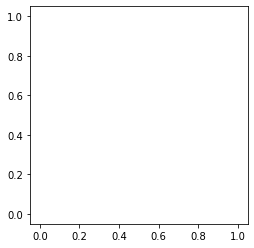

In [7]:
fig, ax = plt.subplots()
plt.axis('scaled')
        
def animate(frame):
    ax.clear()
    ax.set_xlim(-0.5, M1+0.5)
    ax.set_ylim(-0.5, M1+0.5)
    start = -0.5
    stop = M1+0.5
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='red')
        ax.axhline(y=xc, color='red')
    elem = configurations[frame]
    colo = ['r', 'g', 'b','k']
    i = 0
    for t in elem:
        circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
        ax.add_patch(circle)
        i =+1

In [8]:
animation1 = animation.FuncAnimation(fig, animate, interval=500, frames=totalnum)
HTML(animation1.to_html5_video())

In [55]:
def configurations_generator(N):
    xi = [*range(0,M1+1)] #possible x coordinates
    yi = [*range(0,M1+1)] #possible y coordinates
    points = [*itertools.product(xi,yi)] #possible point coordinates
    #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
    #particles considered and their coordinates
    particles = [*range(0, N, 1)]
    index = 0
    while index < N:
        particles[index] = points
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
    configurations=[]
    for elem in config:
        l = list(elem)
        configurations.append(l)
    totalnum = len(configurations)
    print(totalnum)
    newp.append(totalnum)

def maketheplot(N):
    plt.plot(graph, newp)
    plt.show
   
#graph = [*range(1,5)]
#print(graph)
#newp=[]

def pap():
    for N in graph:
        configurations_generator(N)
    print(graph)
    print(newp)
    maketheplot(N)

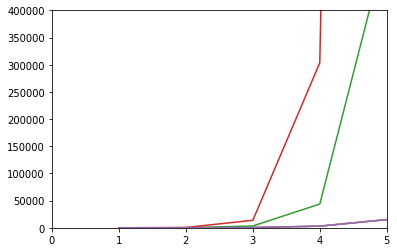

In [56]:
#takes quite a long time
qw = [*range(2,5)]
graph = [*range(1,6)]
#print(qw)
#print(graph)
fig, ax = plt.subplots()

def animate(frame):
    #ax.clear()
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 400000)
    M1 = qw[frame]
    lat = M1 +1
    newp.clear()
    for N in graph:
        #newp(N) = []
        #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))            
        xi = [*range(0,M1+1)] #possible x coordinates            
        yi = [*range(0,M1+1)] #possible y coordinates
        points = [*itertools.product(xi,yi)] #possible point coordinates
        #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
        #particles considered and their coordinates
        particles = [*range(0, N, 1)]
        index = 0
        while index < N:
            particles[index] = points
            index = index + 1
        config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
        configurations=[]
        for elem in config:
            l = list(elem)
            configurations.append(l)
        totalnum = len(configurations)
        #print(totalnum)
        newp.append(totalnum)
    #print(newp)
    maketheplot(N)

animation2 = animation.FuncAnimation(fig, animate, interval=1000, frames=len(qw))
HTML(animation2.to_html5_video())